# Final Frontier

Project workbook for space project

In [34]:
#Imports

import warnings
warnings.filterwarnings("ignore")

#for data manipulation
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size for all plots
plt.rc("figure", figsize = (16,16))

#Set fontsize for titles
plt.rc("font", size=14)

In [2]:
#bring in dataframe

df = pd.read_csv("../Data/Space_Corrected.csv")


In [3]:
df.shape

(4324, 9)

In [4]:
df.sample(4)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
1733,1733,1733,RVSN USSR,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Fri Aug 30, 1991 08:58 UTC",Zenit-2 | Tselina-2 n†­9,StatusRetired,NaN,Failure
945,945,945,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA","Mon Sep 26, 2005 03:37 UTC",Delta II 7925 | GPS IIRM-1,StatusRetired,NaN,Success
1033,1033,1033,Boeing,"SLC-17B, Cape Canaveral AFS, Florida, USA","Mon Aug 25, 2003 05:35 UTC",Delta II 7920H | Spitzer Space Telescope,StatusRetired,NaN,Success
1279,1279,1279,Boeing,"SLC-17B, Cape Canaveral AFS, Florida, USA","Sun Nov 22, 1998 23:54 UTC",Delta II 7925 | BONUM-1,StatusRetired,NaN,Success


In [6]:
#drop columns
df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace = True)

In [7]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [10]:
#check 
df.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [15]:
#check how many unique companies companies are listed
df["Company Name"].nunique()

56

In [16]:
df["Company Name"].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [17]:
df["Status Mission"].nunique()

4

In [18]:
df["Status Mission"].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [27]:
#create a crosstab for comanies and status mission
ctab_df = pd.crosstab(df["Status Mission"], df["Company Name"])

In [32]:
#function to create a distro plot

def distro_plot_for_single_column(dataframe, column_name):
    """Taked in a dataframe name and column name
    and return a distrobution plot for that column"""
    
    #Set figure size for all plots
    plt.rc("figure", figsize = (16,16))

    #Set fontsize for titles
    plt.rc("font", size=14)
    
    #Set color for distro plot
    c = "#5B0A91"
    plt.title(f"Distribution plot for {column_name}")
    sns.distplot(dataframe[column_name], color = c)

In [36]:
def ditro_plot_for_entire_df(df):
    """
    Takes in a numerical only dataframe such as a crosstab
    and returns Distribution plots for each column in the
    dataframe.
    """
    for i, col in enumerate(df.columns):
        plt.figure(i)
        distro_plot_for_single_column(df, col)

In [38]:
#test function to make sure it works and comment out after testing
#ditro_plot_for_entire_df(ctab_df)

In [40]:
df

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


To do:

Use a label encoder on status mission


In [53]:
df_1 = df["Status Mission"].value_counts().reset_index()

In [54]:
df_1

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


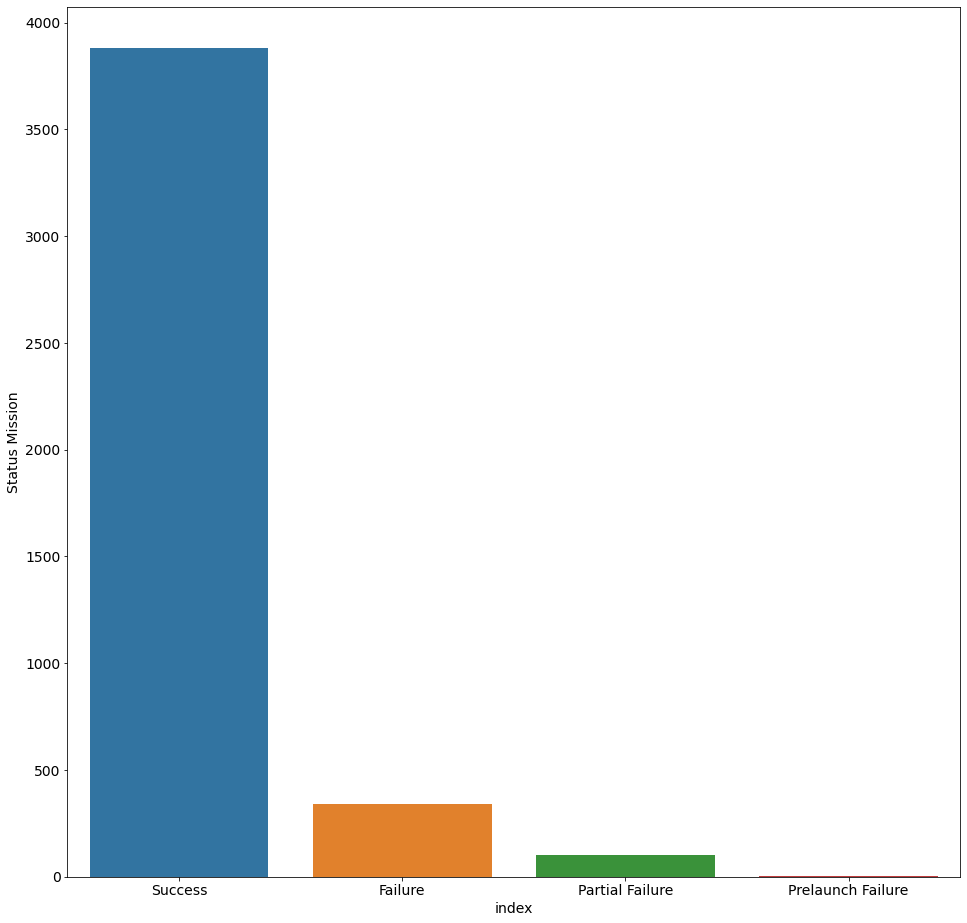

In [59]:
sns.barplot(df_1["index"], df_1["Status Mission"])